<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [82]:
#Start Here
import pandas as pd

import spacy

import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

import re

import pyLDAvis.gensim

In [83]:
df = pd.read_csv('/mnt/c/Github/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [84]:
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

In [85]:
pd.set_option('display.max_colwidth', None)
df['reviews.text'].head(20)

0                                                                                                                                                                                                                                                                                 I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
1                                                                                                                                                                                                                                                                                                                                                         Bulk is always the less expensive way to go for products like these
2                                                                                                                                                                           

In [86]:
nlp = spacy.load("en_core_web_lg")

In [87]:
%%time
## Using Lemmas as our tokens

tokens = []

for doc in nlp.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != 'PRON')) and (token.is_punct !=True):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)
    
len(tokens) == df.shape[0]

CPU times: user 44 s, sys: 8.39 s, total: 52.4 s
Wall time: 52.5 s


True

In [88]:
tokens[0]

['order',
 '3',
 'item',
 'bad',
 'quality',
 'miss',
 'backup',
 'spring',
 'pc',
 'aluminum',
 'battery',
 'work']

In [89]:
id2word = corpora.Dictionary(tokens) #A list of list of tokens 
len(id2word.keys())

9705

In [90]:
# statistical trimming
id2word.filter_extremes(no_below=2, no_above=.95)
len(id2word.keys())

6354

In [91]:
corpora = [id2word.doc2bow(doc) for doc in tokens]
corpora[5]

[(4, 2),
 (20, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 2),
 (38, 1),
 (39, 1)]

In [109]:
%%time
lda = LdaMulticore(corpus=corpora,
                   id2word=id2word,
                   random_state=1984,
                   num_topics=15,
                   workers=10,
                   passes=100)
lda.print_topics()

CPU times: user 1min 15s, sys: 28.6 s, total: 1min 44s
Wall time: 1min 59s


[(0,
  '0.142*"year" + 0.130*"old" + 0.037*"love" + 0.032*"2" + 0.032*"4" + 0.030*"3" + 0.027*"5" + 0.026*"purchase" + 0.024*"buy" + 0.019*"grandson"'),
 (1,
  '0.076*"value" + 0.060*"money" + 0.028*"good" + 0.024*"product" + 0.023*"time" + 0.021*"order" + 0.016*"buy" + 0.015*"return" + 0.014*"store" + 0.012*"work"'),
 (2,
  '0.152*"love" + 0.102*"buy" + 0.058*"gift" + 0.042*"Christmas" + 0.037*"daughter" + 0.029*"get" + 0.027*"tablet" + 0.025*"purchase" + 0.017*"happy" + 0.015*"wife"'),
 (3,
  '0.031*"battery" + 0.028*"charge" + 0.026*"day" + 0.021*"buy" + 0.018*"work" + 0.016*"week" + 0.015*"use" + 0.014*"month" + 0.013*"hour" + 0.013*"2"'),
 (4,
  '0.063*"tablet" + 0.019*"pretty" + 0.018*"good" + 0.017*"kid" + 0.017*"break" + 0.016*"buy" + 0.016*"get" + 0.014*"slow" + 0.012*"case" + 0.011*"iPad"'),
 (5,
  '0.091*"kid" + 0.053*"tablet" + 0.048*"love" + 0.032*"great" + 0.030*"child" + 0.028*"app" + 0.024*"game" + 0.018*"control" + 0.018*"time" + 0.016*"case"'),
 (6,
  '0.349*"good" + 

In [110]:
%%time
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
year old love 2 4

------ Topic 1 ------
value money good product time

------ Topic 2 ------
love buy gift Christmas daughter

------ Topic 3 ------
battery charge day buy work

------ Topic 4 ------
tablet pretty good kid break

------ Topic 5 ------
kid tablet love great child

------ Topic 6 ------
good price product quality work

------ Topic 7 ------
tablet Fire fire Kindle 8

------ Topic 8 ------
battery long brand great work

------ Topic 9 ------
app Amazon screen device tablet

------ Topic 10 ------
read book game watch use

------ Topic 11 ------
size small right need perfect

------ Topic 12 ------
great price tablet product recommend

------ Topic 13 ------
work great sound picture camera

------ Topic 14 ------
easy use love tablet light

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.2 ms


In [111]:
# Interpretation and visualization
pyLDAvis.enable_notebook()

In [113]:
%%time
pyLDAvis.gensim.prepare(lda,corpora,id2word)

CPU times: user 9.86 s, sys: 125 ms, total: 9.98 s
Wall time: 10.4 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.186400  0.071495       1        1  17.196835
9     -0.025432  0.076058       2        1   8.740533
5      0.199357 -0.054240       3        1   8.392856
3     -0.098025  0.260232       4        1   7.423297
10     0.164223 -0.054193       5        1   7.164120
7      0.026870  0.015786       6        1   7.020577
12    -0.074255 -0.259712       7        1   6.302252
2      0.192087 -0.006097       8        1   5.859575
6     -0.287167 -0.152429       9        1   5.305857
0      0.182834  0.112240      10        1   4.882887
14     0.149982 -0.120020      11        1   4.823486
13    -0.082191 -0.069133      12        1   4.689255
4      0.004323  0.041952      13        1   4.420254
11    -0.006306  0.077247      14        1   4.078448
1     -0.159900  0.060813      15        1   3.699770, topic_info=           Term         Freq        Total Category  logprob  loglift
34         good  6648.000000  6648.000000  Default  30.0000  30.0000
4       battery  9492.000000  9492.000000  Default  29.0000  29.0000
33         easy  3303.000000  3303.000000  Default  28.0000  28.0000
22        great  8782.000000  8782.000000  Default  27.0000  27.0000
88         love  6001.000000  6001.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
238   excellent    70.001953   674.244324  Topic15  -5.1496   1.0318
185        will    55.497746   297.188904  Topic15  -5.3818   1.6189
22        great    67.484856  8782.080078  Topic15  -5.1862  -1.5717
3049     tablet    63.182095  7773.045898  Topic15  -5.2521  -1.5155
102        need    55.851341  1831.275513  Topic15  -5.3755  -0.1932

[1059 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3849      2  0.254811       $
3849      6  0.239823       $
3849     13  0.220551       $
3849     14  0.216269       $
3849     15  0.066379       $
...     ...       ...     ...
1025     13  0.036409   young
1330      3  0.438893      yr
1330      8  0.492720      yr
1330     13  0.062108      yr
3670     14  0.872769  zipper

[2463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 6, 4, 11, 8, 13, 3, 7, 1, 15, 14, 5, 12, 2])

In [114]:
lda[corpora[0]]

[(1, 0.12135304), (3, 0.44034547), (6, 0.23849532), (11, 0.14334355)]

In [115]:
distro = [lda[d] for d in corpora]

In [116]:
%%time
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 43.4 ms


In [119]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics
doc_topics.head()

,year old love 2 4,value money good product time,love buy gift Christmas daughter,battery charge day buy work,tablet pretty good kid break,kid tablet love great child,good price product quality work,tablet Fire fire Kindle 8,battery long brand great work,app Amazon screen device tablet,read book game watch use,size small right need perfect,great price tablet product recommend,work great sound picture camera,easy use love tablet light
0,0.000000,0.121336,0.000000,0.440309,0.000000,0.000000,0.238561,0.000000,0.143331,NaN,NaN,NaN,NaN,NaN,NaN
1,0.011111,0.011112,0.011111,0.011112,0.011112,0.011112,0.011112,0.011112,0.011111,0.652240,0.011112,0.011112,0.203311,0.011112,0.011112
2,0.016667,0.016667,0.016668,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.766659,0.016667,0.016667,0.016667,0.016667,0.016667
3,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844443,0.011111,0.011111,0.011111,0.011111,0.011111
4,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.661701,0.011111,0.011111,0.193853,0.011111,0.011111


In [120]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)
doc_topics['primary_topic'].value_counts()

app Amazon screen device tablet         6295
great price tablet product recommend    2807
kid tablet love great child             2509
good price product quality work         2309
love buy gift Christmas daughter        2190
size small right need perfect           1800
tablet Fire fire Kindle 8               1604
work great sound picture camera         1392
battery charge day buy work             1386
read book game watch use                1359
easy use love tablet light              1173
year old love 2 4                       1031
value money good product time            988
tablet pretty good kid break             817
battery long brand great work            672
Name: primary_topic, dtype: int64

In [121]:
# Select appropriate number of topics
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [122]:
%%time
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=10)

CPU times: user 5min 8s, sys: 6min 13s, total: 11min 21s
Wall time: 13min 17s


In [123]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-2.281787
1,0,5,-2.321047
2,0,7,-2.324559
3,0,9,-2.421326
4,0,11,-2.358949


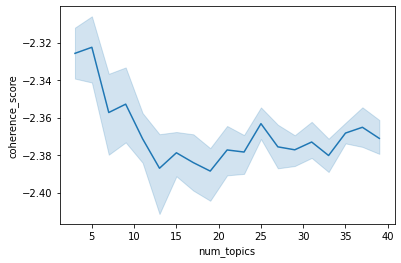

In [124]:
import seaborn as sns
 
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [125]:
# Replotting with 5 Topics
%%time
lda = LdaMulticore(corpus=corpora,
                   id2word=id2word,
                   random_state=1984,
                   num_topics=5,
                   workers=10,
                   passes=100)
lda.print_topics()

CPU times: user 1min 22s, sys: 30.5 s, total: 1min 52s
Wall time: 2min 9s


[(0,
  '0.068*"love" + 0.041*"kid" + 0.037*"tablet" + 0.035*"year" + 0.034*"old" + 0.026*"buy" + 0.025*"use" + 0.021*"great" + 0.020*"easy" + 0.019*"game"'),
 (1,
  '0.016*"screen" + 0.015*"charge" + 0.013*"Kindle" + 0.011*"like" + 0.011*"device" + 0.009*"light" + 0.008*"sound" + 0.008*"time" + 0.008*"kindle" + 0.007*"turn"'),
 (2,
  '0.063*"great" + 0.044*"good" + 0.040*"tablet" + 0.040*"price" + 0.035*"buy" + 0.035*"love" + 0.025*"product" + 0.016*"fire" + 0.016*"Fire" + 0.016*"recommend"'),
 (3,
  '0.098*"battery" + 0.031*"work" + 0.031*"good" + 0.028*"great" + 0.028*"long" + 0.026*"price" + 0.022*"brand" + 0.018*"buy" + 0.013*"Amazon" + 0.012*"life"'),
 (4,
  '0.047*"tablet" + 0.028*"use" + 0.027*"book" + 0.026*"read" + 0.024*"easy" + 0.023*"app" + 0.021*"great" + 0.015*"Amazon" + 0.014*"good" + 0.011*"game"')]

In [126]:
%%time
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
love kid tablet year old

------ Topic 1 ------
screen charge Kindle like device

------ Topic 2 ------
great good tablet price buy

------ Topic 3 ------
battery work good great long

------ Topic 4 ------
tablet use book read easy

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.5 ms


In [127]:
%%time
pyLDAvis.gensim.prepare(lda,corpora,id2word)

CPU times: user 10.4 s, sys: 844 ms, total: 11.3 s
Wall time: 12.2 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.184707 -0.139757       1        1  28.953547
4      0.041283  0.135832       2        1  20.778202
0      0.252136 -0.029757       3        1  18.384430
2      0.022731 -0.126427       4        1  16.169968
1     -0.131443  0.160109       5        1  15.713856, topic_info=         Term         Freq        Total Category  logprob  loglift
4     battery  9265.000000  9265.000000  Default  30.0000  30.0000
88       love  5987.000000  5987.000000  Default  29.0000  29.0000
3049   tablet  7599.000000  7599.000000  Default  28.0000  28.0000
178       kid  2856.000000  2856.000000  Default  27.0000  27.0000
19      price  4934.000000  4934.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
102      need   283.575439  1810.057251   Topic5  -5.1969  -0.0030
25     Amazon   307.147919  3087.223145   Topic5  -5.1171  -0.4571
31        buy   297.979126  5616.204102   Topic5  -5.1474  -1.0858
34       good   296.614990  6685.370117   Topic5  -5.1520  -1.2646
103     thing   251.636749   981.890503   Topic5  -5.3164   0.4891

[357 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3849      2  0.283531      $
3849      4  0.192547      $
3849      5  0.524744      $
204       1  0.280924      2
204       2  0.016647      2
...     ...       ...    ...
100       3  0.933123   year
100       4  0.005824   year
1025      3  0.993657  young
1025      4  0.003975  young
1330      3  0.996195     yr

[588 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 3, 2])

In [128]:
lda[corpora[0]]

[(0, 0.015613528),
 (1, 0.015882242),
 (2, 0.015641764),
 (3, 0.9371365),
 (4, 0.015725998)]

In [129]:
distro = [lda[d] for d in corpora]

In [130]:
%%time
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 37.9 ms


In [131]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics
doc_topics.head()

,love kid tablet year old,screen charge Kindle like device,great good tablet price buy,battery work good great long,tablet use book read easy
0,0.015614,0.015892,0.015642,0.937127,0.015726
1,0.033669,0.033955,0.034777,0.863757,0.033842
2,0.050178,0.050180,0.417258,0.432302,0.050082
3,0.033349,0.033570,0.034113,0.865558,0.033410
4,0.033469,0.033350,0.034092,0.865580,0.033508


In [132]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)
doc_topics['primary_topic'].value_counts()

battery work good great long        9758
great good tablet price buy         6389
love kid tablet year old            5272
tablet use book read easy           4476
screen charge Kindle like device    2437
Name: primary_topic, dtype: int64

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling